In [1]:
import json

In [5]:
with open("./results.json", "r") as f:
    results = json.loads(f.read())

In [6]:
data = {}

def combine(ds_key, ds_results):
    if ds_key not in data:
        data[ds_key] = {}
    for format, format_results in ds_results.items():
        for exp, exp_results in format_results.items():
            if exp not in data[ds_key]:
                data[ds_key][exp] = {}
            data[ds_key][exp][format] = sum(exp_results) / len(exp_results) / 1e9

for ds_key, ds_results in results.items():
    combine(ds_key, ds_results)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

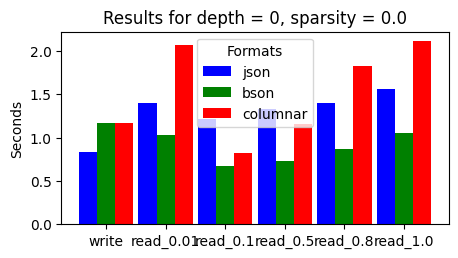

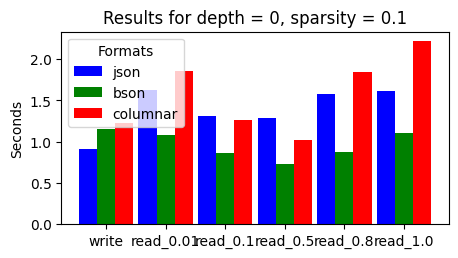

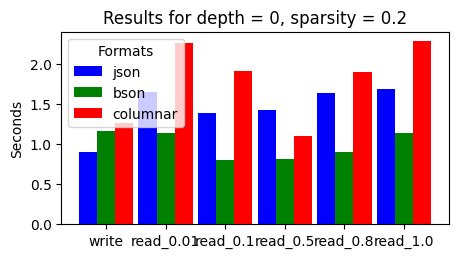

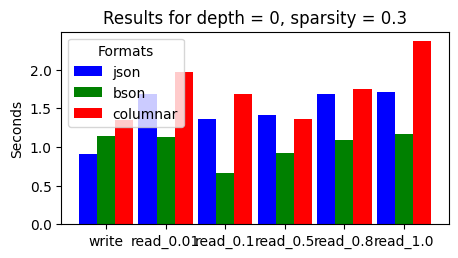

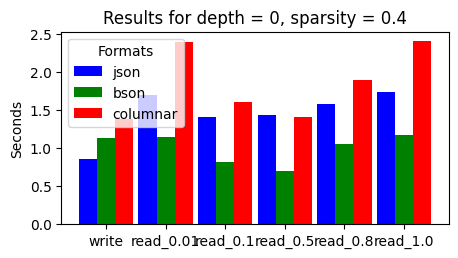

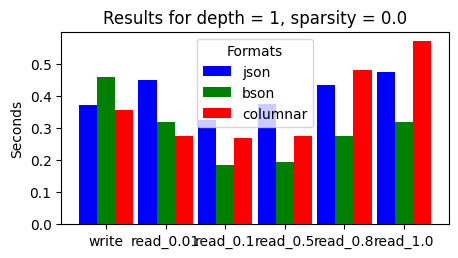

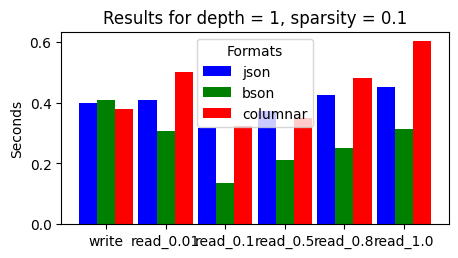

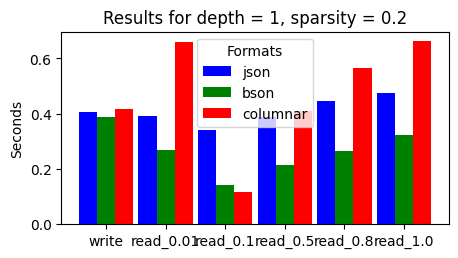

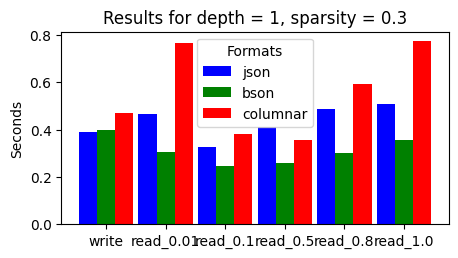

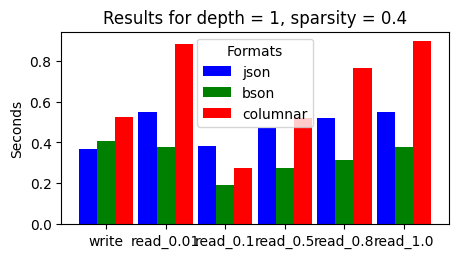

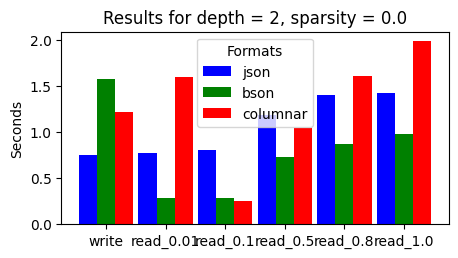

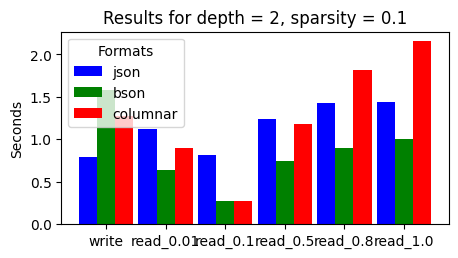

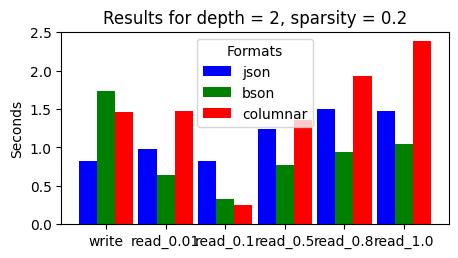

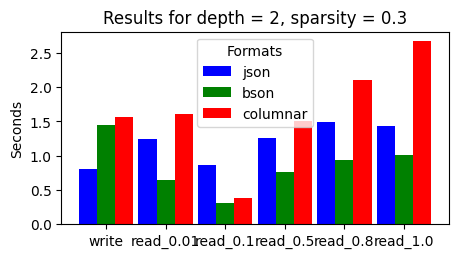

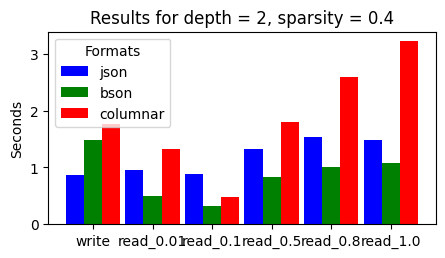

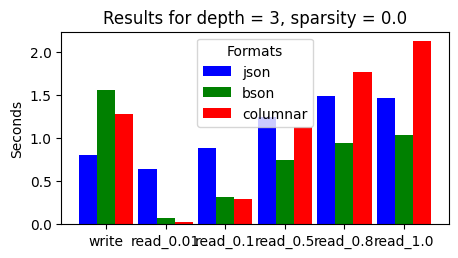

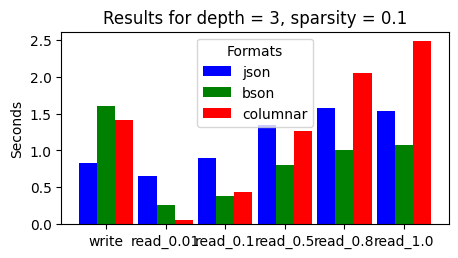

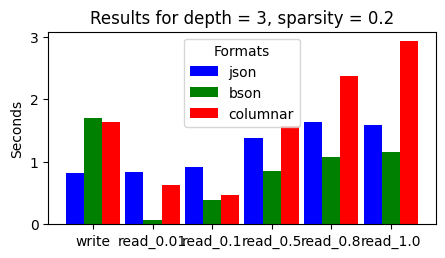

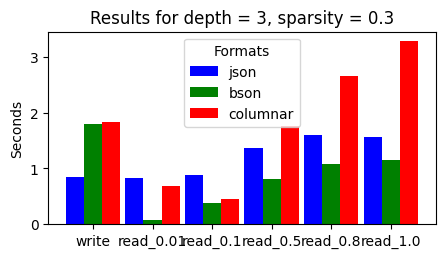

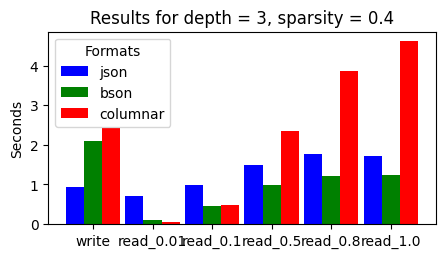

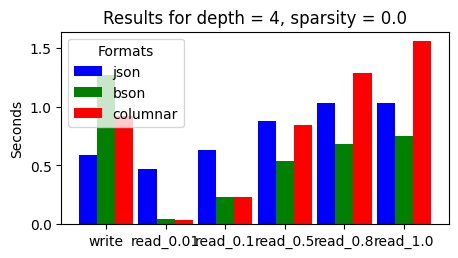

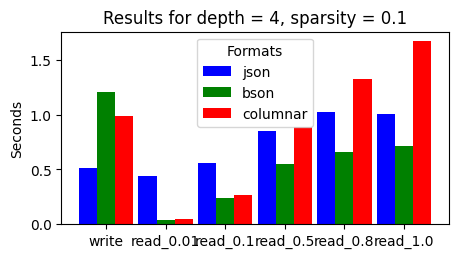

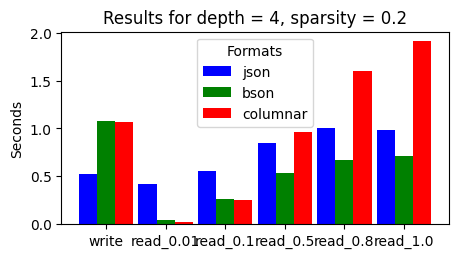

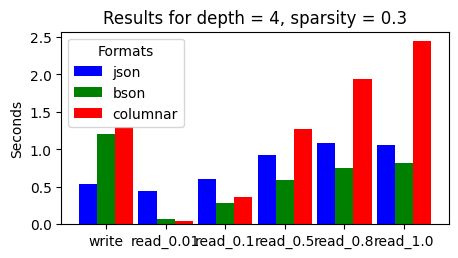

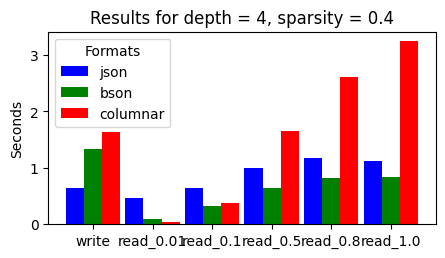

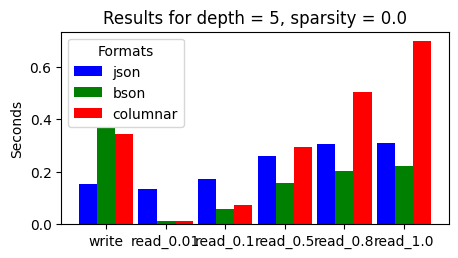

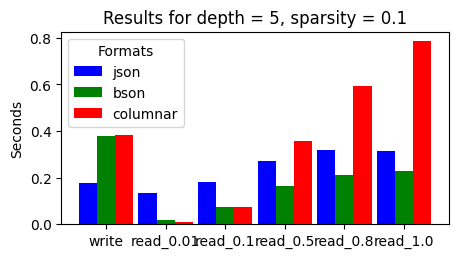

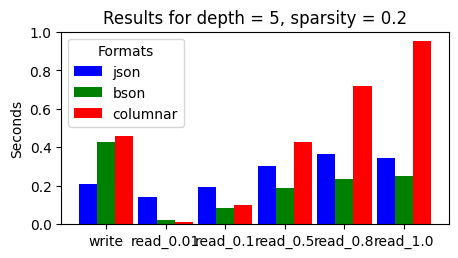

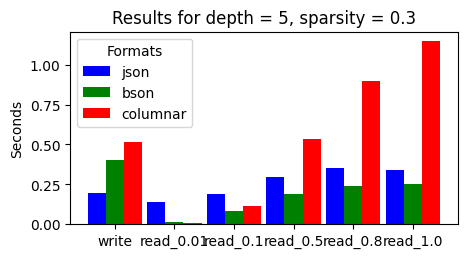

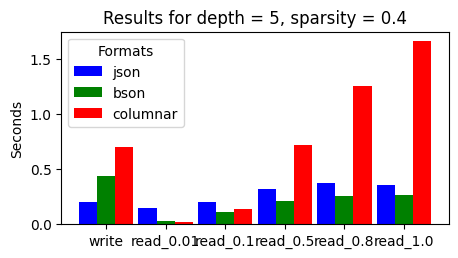

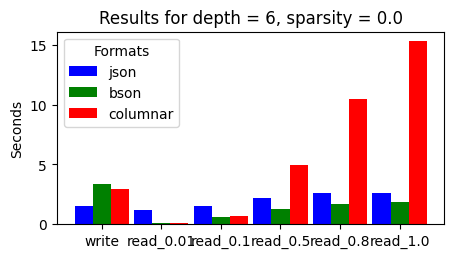

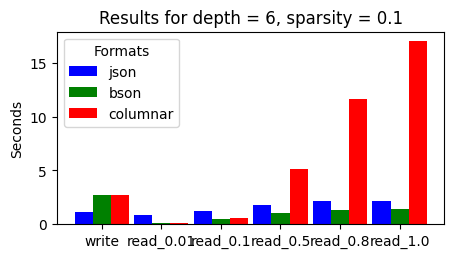

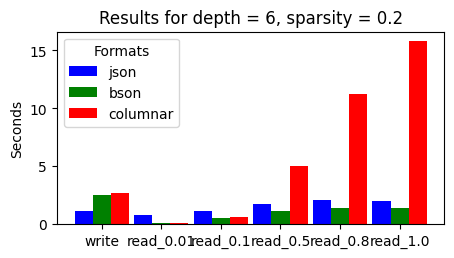

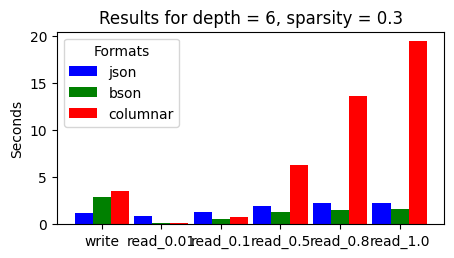

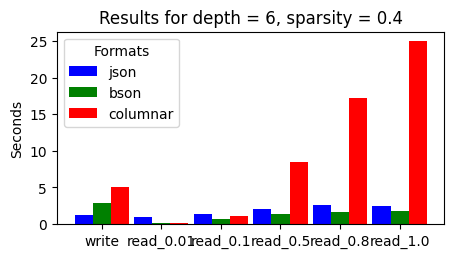

In [9]:
colors = {
    "json": "blue",
    "bson": "green",
    "columnar": "red",
}

for dataset_name, experiments in data.items():
    # Extract the data for plotting
    labels = list(experiments.keys())
    formats = list(next(iter(experiments.values())).keys())
    num_formats = len(formats)

    # Create figure and axes
    fig, ax = plt.subplots(figsize=(6, 2.5))
    width = 0.35  # bar width
    group_width = width * num_formats  # total width of a group
    spacing = 0.1  # space between groups

    # Creating bars for each format
    for i, format_name in enumerate(formats):
        values = [experiments[exp][format_name] for exp in labels]
        # Calculate positions with spacing between groups
        positions = np.arange(len(labels)) * (group_width + spacing) + i * width
        ax.bar(positions, values, width, label=format_name, color=colors[format_name])

    # Adding labels and title
    ax.set_ylabel('Seconds')
    ax.set_title(f'Results for depth = {dataset_name[0]}, sparsity = {dataset_name[2:]}')
    ax.set_xticks(np.arange(len(labels)) * (group_width + spacing) + width / 2 * (num_formats - 1))
    ax.set_xticklabels(labels)
    ax.legend(title="Formats")

    # Display the plot
    plt.show()
